In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from scipy import stats
%matplotlib inline

In [57]:
train_eda = pd.read_csv('datasets/reduced_train.csv')
test_eda = pd.read_csv('datasets/reduced_test.csv')

In [58]:
train_eda.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Land Contour,Neighborhood,Condition 1,Condition 2,...,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,60,RL,NaN,13517,Pave,Lvl,Sawyer,RRAe,Norm,...,RFn,2.0,475.0,TA,TA,Y,3,2010,WD,130500
1,544,60,RL,43.0,11492,Pave,Lvl,SawyerW,Norm,Norm,...,RFn,2.0,559.0,TA,TA,Y,4,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,Lvl,NAmes,Norm,Norm,...,Unf,1.0,246.0,TA,TA,Y,1,2010,WD,109000
3,318,60,RL,73.0,9802,Pave,Lvl,Timber,Norm,Norm,...,Fin,2.0,400.0,TA,TA,Y,4,2010,WD,174000
4,255,50,RL,82.0,14235,Pave,Lvl,SawyerW,Norm,Norm,...,Unf,2.0,484.0,TA,TA,N,3,2010,WD,138500


In [59]:
train_eda.isna().sum().sort_values(ascending=False).head(17)

Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Type        113
Bsmt Exposure       58
Bsmt Cond           55
BsmtFin Type 1      55
Bsmt Qual           55
Mas Vnr Type        22
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
BsmtFin SF 1         1
Total Bsmt SF        1
Overall Qual         0
dtype: int64

In [60]:
test_eda.isna().sum().sort_values(ascending=False).head(17)

Fireplace Qu      422
Lot Frontage      160
Garage Finish      45
Garage Cond        45
Garage Qual        45
Garage Type        44
Bsmt Exposure      25
BsmtFin Type 1     25
Bsmt Cond          25
Bsmt Qual          25
Mas Vnr Type        1
Electrical          1
Overall Qual        0
Exterior 2nd        0
Exterior 1st        0
Year Remod/Add      0
Year Built          0
dtype: int64

In [61]:
#imputing missing values, NA for where the actual value is an NA in the data dictionary, and 0s for the categories lacking particular feature
train_eda["Fireplace Qu"].fillna('NA', inplace=True)
train_eda["Garage Finish"].fillna('NA', inplace=True)
train_eda["Garage Cond"].fillna('NA', inplace=True)
train_eda["Garage Qual"].fillna('NA', inplace=True)
train_eda["Garage Type"].fillna('NA', inplace=True)
train_eda["Bsmt Exposure"].fillna('NA', inplace=True)
train_eda["Bsmt Cond"].fillna('NA', inplace=True)
train_eda["BsmtFin Type 1"].fillna('NA', inplace=True)
train_eda["Bsmt Qual"].fillna('NA', inplace=True)
train_eda["Mas Vnr Type"].fillna('none', inplace=True)
train_eda["Bsmt Full Bath"].fillna(0.0, inplace=True)
train_eda["Garage Cars"].fillna(0.0, inplace=True)
train_eda["Garage Area"].fillna(0.0, inplace=True)
train_eda["BsmtFin SF 1"].fillna(0.0, inplace=True)
train_eda["Total Bsmt SF"].fillna(0.0, inplace=True)

In [62]:
train_eda.isna().sum().sort_values(ascending=False).head()

Lot Frontage    330
SalePrice         0
Overall Cond      0
Bsmt Cond         0
Bsmt Qual         0
dtype: int64

In [63]:
train_eda['Lot Frontage'].mean()

69.05520046484602

In [64]:
#imputing mean lot frontage size for missing values
train_eda['Lot Frontage'] = train_eda['Lot Frontage'].fillna(train_eda['Lot Frontage'].mean())
test_eda['Lot Frontage'] = test_eda['Lot Frontage'].fillna(test_eda['Lot Frontage'].mean())

In [65]:
train_eda['Lot Frontage'] = train_eda['Lot Frontage'].astype(int)
test_eda['Lot Frontage'] = test_eda['Lot Frontage'].astype(int)

In [66]:
train_eda.isna().sum().sum()

0

In [67]:
test_eda.isna().sum().sort_values(ascending=False).head(12)

Fireplace Qu      422
Garage Finish      45
Garage Cond        45
Garage Qual        45
Garage Type        44
Bsmt Exposure      25
BsmtFin Type 1     25
Bsmt Cond          25
Bsmt Qual          25
Mas Vnr Type        1
Electrical          1
Overall Qual        0
dtype: int64

In [68]:
test_eda["Fireplace Qu"].fillna('NA', inplace=True)
test_eda["Garage Finish"].fillna('NA', inplace=True)
test_eda["Garage Cond"].fillna('NA', inplace=True)
test_eda["Garage Qual"].fillna('NA', inplace=True)
test_eda["Garage Type"].fillna('NA', inplace=True)
test_eda["Bsmt Exposure"].fillna('NA', inplace=True)
test_eda["Bsmt Cond"].fillna('NA', inplace=True)
test_eda["BsmtFin Type 1"].fillna('NA', inplace=True)
test_eda["Bsmt Qual"].fillna('NA', inplace=True)
test_eda["Mas Vnr Type"].fillna('none', inplace=True)
test_eda["Bsmt Full Bath"].fillna(0.0, inplace=True)
test_eda["Garage Cars"].fillna(0.0, inplace=True)
test_eda["Garage Area"].fillna(0.0, inplace=True)
test_eda["BsmtFin SF 1"].fillna(0.0, inplace=True)
test_eda["Total Bsmt SF"].fillna(0.0, inplace=True)
test_eda["Electrical"].fillna('SBrKr', inplace=True)

In [69]:
train_eda.isna().sum().sum()

0

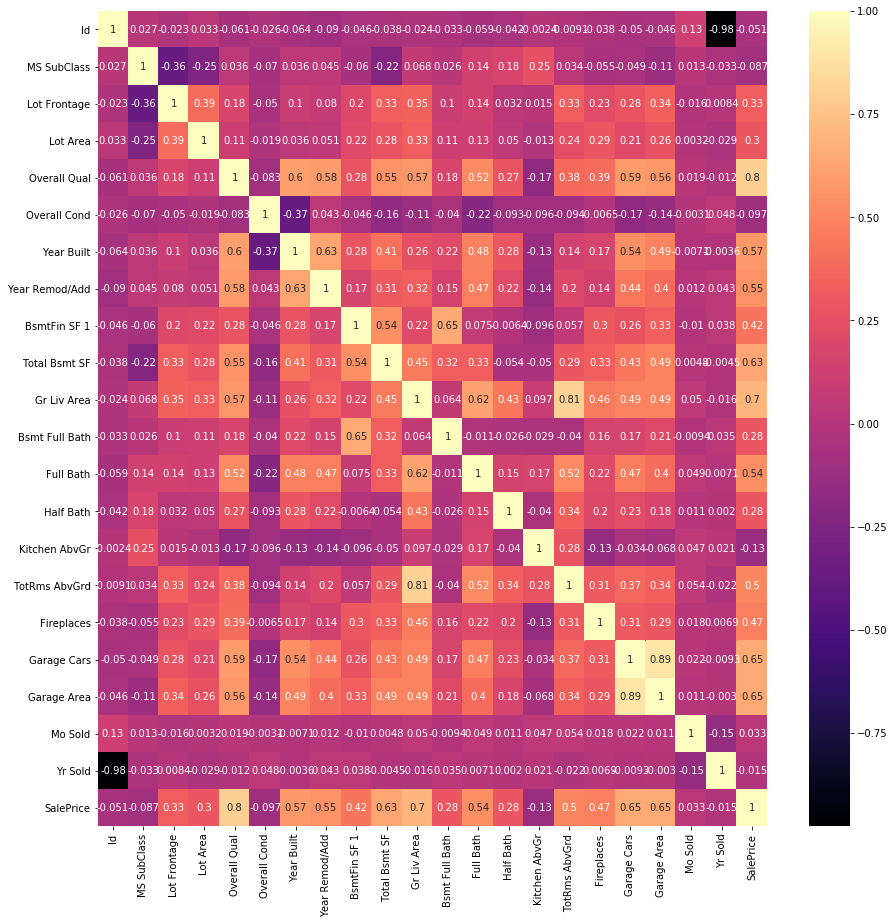

In [70]:
#checking corr values to get an idea of key features 
plt.figure(figsize=(15,15))
sns.heatmap(train_eda.corr(), annot=True, cmap='magma')

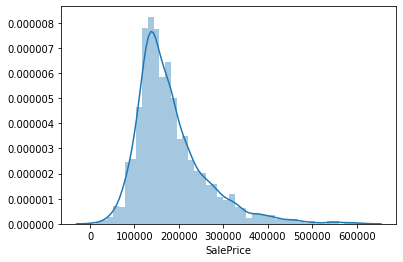

In [71]:
sns.distplot(train_eda['SalePrice'])

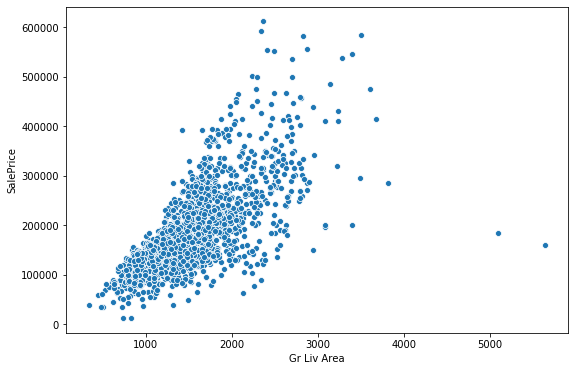

In [72]:
##delving into charts and graphs on data that might be worth exploring for feature analysis
plt.figure(figsize=(9, 6))
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=train_eda);

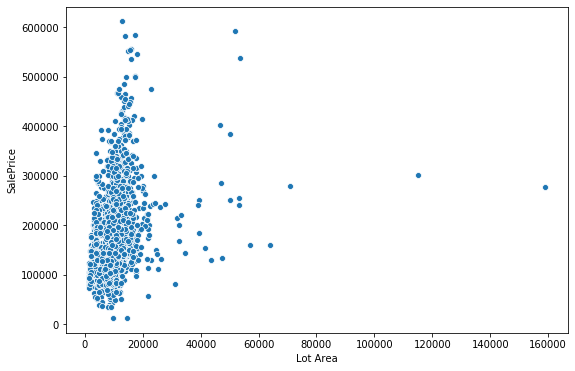

In [73]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x="Lot Area", y="SalePrice", data=train_eda);

Text(0.5, 1.0, 'AC')

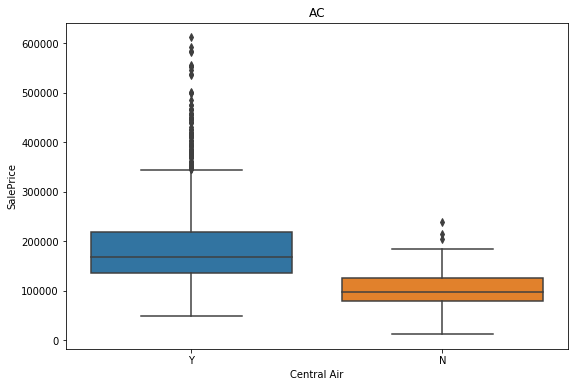

In [74]:
plt.figure(figsize=(9, 6))
sns.boxplot(x="Central Air", y="SalePrice", data=train_eda);
plt.title('AC', fontsize=12)

In [75]:
#want to visualize spacial features quickly 
spacial = train_eda[['Lot Area', 'Total Bsmt SF', 'Garage Area', 'Gr Liv Area', 'SalePrice']]

In [76]:
spacial.columns

Index(['Lot Area', 'Total Bsmt SF', 'Garage Area', 'Gr Liv Area', 'SalePrice'], dtype='object')

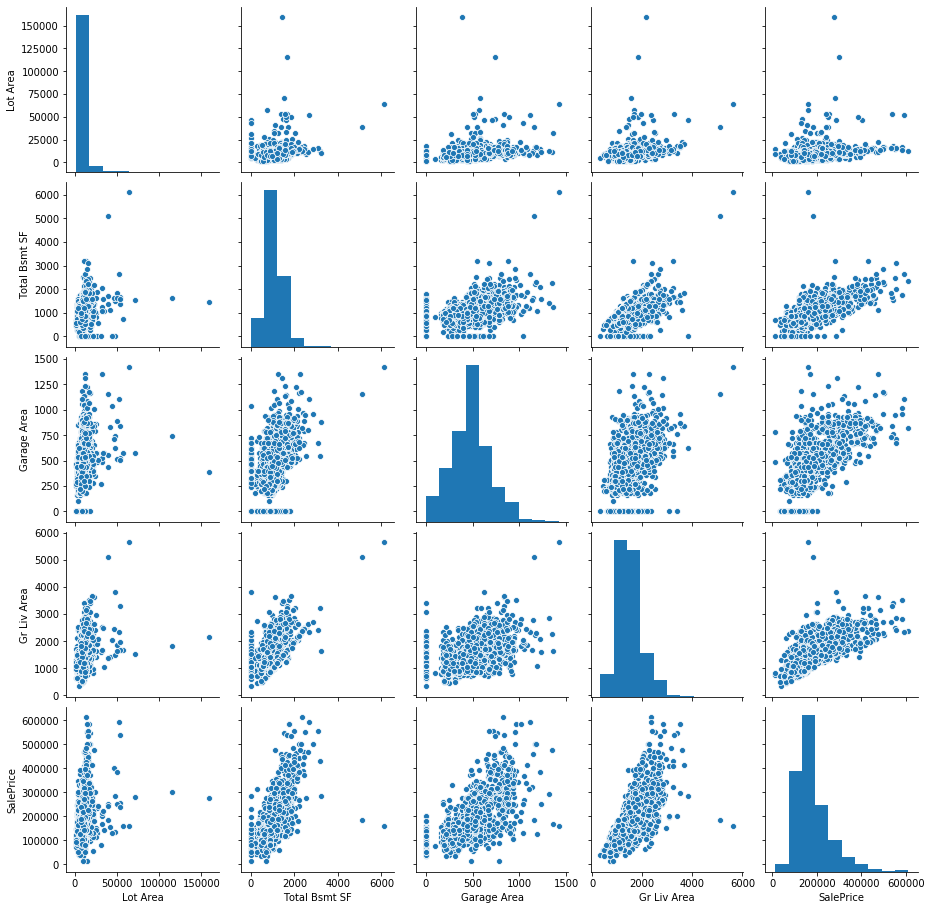

In [77]:
sns.pairplot(spacial)

# Will be creating some visuals to help find pertinent data

Text(0.5, 1.0, 'Housing price by neighborhood')

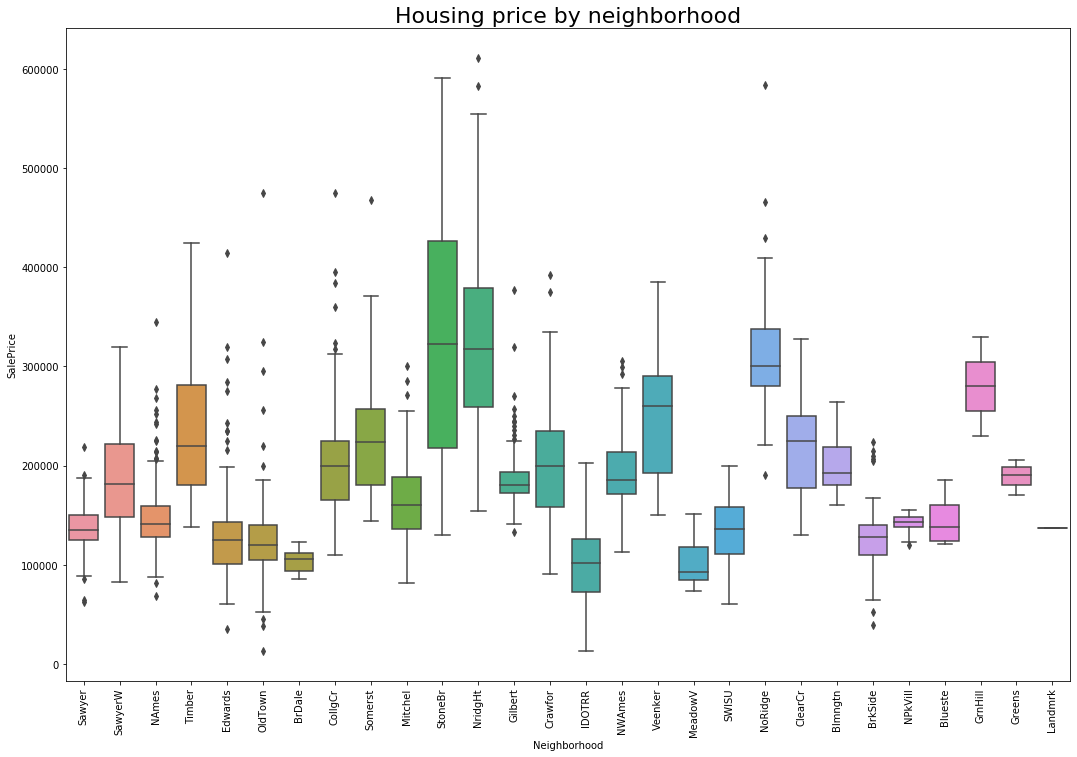

In [78]:
plt.figure(figsize=(18, 12))
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=train_eda)
plt.xticks(rotation=90) 
plt.title('Housing price by neighborhood', fontsize=22)

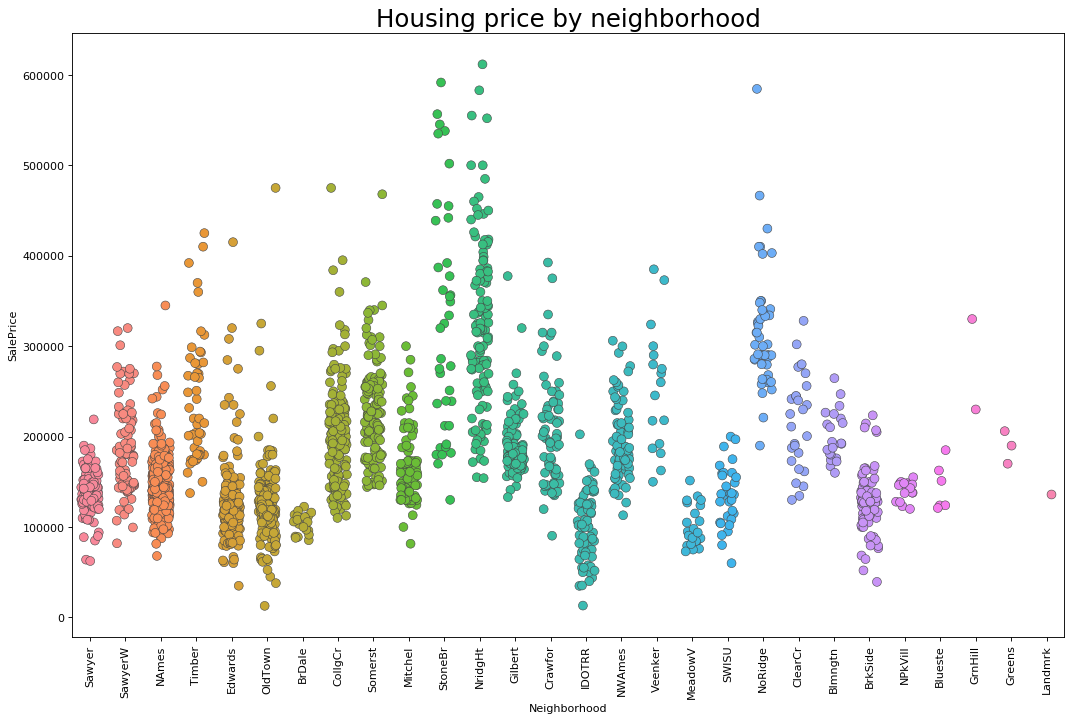

In [79]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(train_eda.Neighborhood, train_eda.SalePrice, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.xticks(rotation=90) 
plt.title('Housing price by neighborhood', fontsize=22)
plt.show()

Text(0.5, 1.0, 'Overall Quality vs Sale Price ')

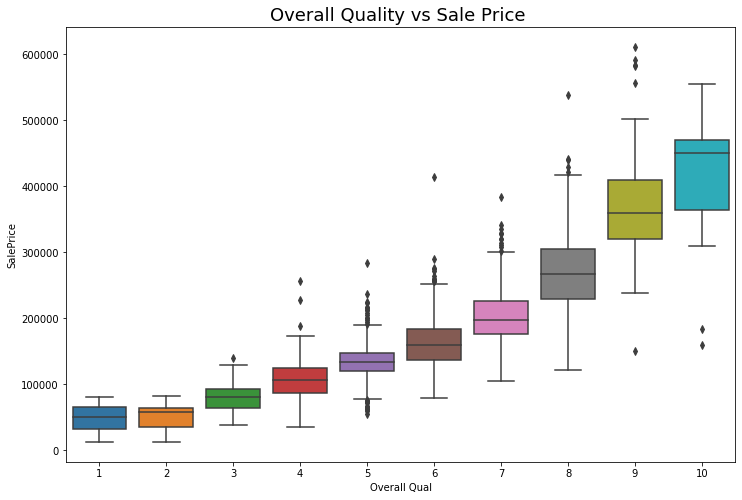

In [80]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x="Overall Qual", y="SalePrice", data=train_eda)
plt.title('Overall Quality vs Sale Price ', fontsize=18)

Text(0.5, 1.0, 'Housing price by year')

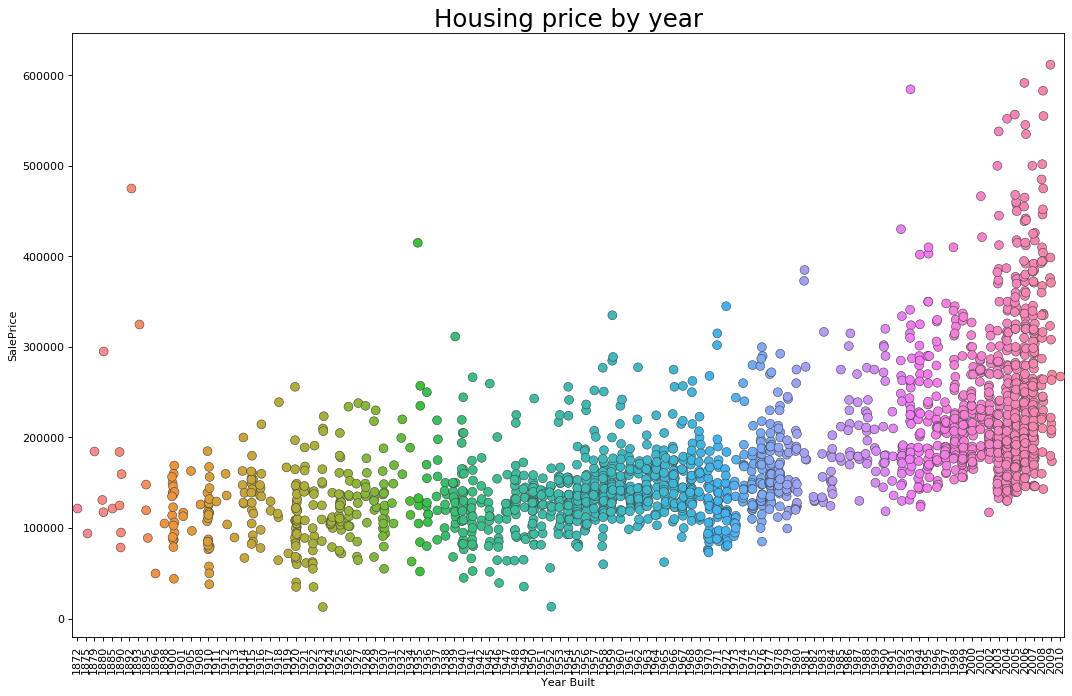

In [81]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(train_eda['Year Built'], train_eda.SalePrice, jitter=0.15, size=8, ax=ax, linewidth=.5)
plt.xticks(rotation=90) 
plt.title('Housing price by year', fontsize=22)

In [82]:
test_eda.head(3)

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Land Contour,Neighborhood,Condition 1,Condition 2,...,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Mo Sold,Yr Sold,Sale Type
0,2658,190,RM,69,9142,Pave,Lvl,OldTown,Norm,Norm,...,Detchd,Unf,1,440,Po,Po,Y,4,2006,WD
1,2718,90,RL,69,9662,Pave,Lvl,Sawyer,Norm,Norm,...,Attchd,Fin,2,580,TA,TA,Y,8,2006,WD
2,2414,60,RL,58,17104,Pave,Lvl,Gilbert,Norm,Norm,...,Attchd,RFn,2,426,TA,TA,Y,9,2006,New


# Imputing values in columns

In [83]:
###converting some ordinal features into numerical input to help with linear model 
values = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
for feature in ['Bsmt Qual', 'Bsmt Cond', 'Garage Qual']:
    train_eda[feature] = train_eda[feature].map(values) 

In [84]:
## mapping same to test_eda
values = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
for feature in ['Bsmt Qual', 'Bsmt Cond', 'Garage Qual']:
    test_eda[feature] = test_eda[feature].map(values) 

In [85]:
train_eda.head(2)

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Land Contour,Neighborhood,Condition 1,Condition 2,...,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,60,RL,69,13517,Pave,Lvl,Sawyer,RRAe,Norm,...,RFn,2.0,475.0,3,TA,Y,3,2010,WD,130500
1,544,60,RL,43,11492,Pave,Lvl,SawyerW,Norm,Norm,...,RFn,2.0,559.0,3,TA,Y,4,2009,WD,220000


In [86]:
values = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
for feature in ['Exter Qual', 'Heating QC', 'Kitchen Qual']:
    train_eda[feature] = train_eda[feature].map(values) 

In [87]:
## mapping same to test_eda
values = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
for feature in ['Exter Qual', 'Heating QC', 'Kitchen Qual']:
    test_eda[feature] = test_eda[feature].map(values) 

In [89]:
values = {'Fin': 3, 'RFn':2, 'Unf':1, 'NA':0}
for feature in ['Garage Finish']:
    test_eda[feature] = test_eda[feature].map(values) 
    train_eda[feature] = train_eda[feature].map(values)

In [90]:
### looking at columns and assessing which to keep for further analysis and modeling... then dropping any unhelpful or multicolinear data that may impact results
train_eda.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Land Contour', 'Neighborhood', 'Condition 1', 'Condition 2',
       'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'Total Bsmt SF', 'Heating QC', 'Central Air', 'Electrical',
       'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Mo Sold', 'Yr Sold', 'Sale Type', 'SalePrice'],
      dtype='object')

In [91]:
train_eda['MS Zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

In [92]:
train_eda['Land Contour'].value_counts()

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64

In [93]:
train_eda['Heating QC'].value_counts()

5    1065
3     597
4     319
2      67
1       3
Name: Heating QC, dtype: int64

In [94]:
test_eda['Central Air'] = [1 if i == 'Y' else 0 for i in test_eda['Central Air']]
train_eda['Central Air'] = [1 if i == 'Y' else 0 for i in train_eda['Central Air']]

In [95]:
train_eda['Half Bath'].value_counts()

0    1308
1     725
2      18
Name: Half Bath, dtype: int64

In [96]:
train_eda['Half Bath'].value_counts()

0    1308
1     725
2      18
Name: Half Bath, dtype: int64

In [97]:
test_eda['Half Bath'] = test_eda['Half Bath'] * .5
train_eda['Half Bath'] = train_eda['Half Bath'] * .5

In [98]:
train_eda['Half Bath'].value_counts()

0.0    1308
0.5     725
1.0      18
Name: Half Bath, dtype: int64

In [99]:
train_eda['total bath'] = train_eda['Half Bath'] + train_eda['Bsmt Full Bath'] + train_eda['Full Bath']
test_eda['total bath'] = test_eda['Half Bath'] + test_eda['Bsmt Full Bath'] + test_eda['Full Bath']

In [100]:
train_eda['total sf'] = train_eda['Gr Liv Area'] + train_eda['Total Bsmt SF'] + train_eda['Garage Area']
test_eda['total sf'] = test_eda['Gr Liv Area'] + test_eda['Total Bsmt SF'] + test_eda['Garage Area']

In [107]:
train_eda.drop(['MS SubClass', 'MS Zoning', 'Street', 'Land Contour','Condition 1', 'Condition 2',
       'Bldg Type', 'House Style', 'Overall Cond', 'Mas Vnr Type', 'Exter Cond', 'Bsmt Exposure', 
        'BsmtFin Type 1', 'BsmtFin SF 1', 'Electrical', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
        'Kitchen AbvGr','Fireplace Qu', 'Garage Cond', 'Sale Type'], axis=1, inplace=True)

In [109]:
test_eda.drop(['MS SubClass', 'MS Zoning', 'Street', 'Land Contour','Condition 1', 'Condition 2',
       'Bldg Type', 'House Style', 'Overall Cond', 'Mas Vnr Type', 'Exter Cond', 'Bsmt Exposure', 
        'BsmtFin Type 1', 'BsmtFin SF 1', 'Electrical', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
        'Kitchen AbvGr','Fireplace Qu', 'Garage Cond', 'Sale Type' ], axis=1, inplace=True)

In [110]:
train_eda.isna().sum().sum()

0

In [111]:
test_eda.isna().sum().sum()

0

In [112]:
train_eda.columns

Index(['Id', 'Lot Frontage', 'Lot Area', 'Neighborhood', 'Overall Qual',
       'Year Built', 'Year Remod/Add', 'Exterior 1st', 'Exterior 2nd',
       'Exter Qual', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Total Bsmt SF',
       'Heating QC', 'Central Air', 'Gr Liv Area', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Paved Drive', 'Mo Sold', 'Yr Sold', 'SalePrice', 'total bath',
       'total sf'],
      dtype='object')

In [113]:
values = {'Y': 3, 'P':2, 'N':1}
for feature in ['Paved Drive']:
    test_eda[feature] = test_eda[feature].map(values) 
    train_eda[feature] = train_eda[feature].map(values)

In [116]:
train_eda['age'] = train_eda['Yr Sold'] - train_eda['Year Built']
test_eda['age'] = test_eda['Yr Sold'] - test_eda['Year Built']

In [117]:
test_eda.head()

,Id,Lot Frontage,Lot Area,Neighborhood,Overall Qual,Year Built,Year Remod/Add,Exterior 1st,Exterior 2nd,Exter Qual,...,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Mo Sold,Yr Sold,total bath,total sf,age
0,2658,69,9142,OldTown,6,1910,1950,AsbShng,AsbShng,3,...,1,1,440,1,3,4,2006,2.0,3388,96
1,2718,69,9662,Sawyer,5,1977,1977,Plywood,Plywood,3,...,3,2,580,3,3,8,2006,2.0,4514,29
2,2414,58,17104,Gilbert,7,2006,2006,VinylSd,VinylSd,4,...,2,2,426,3,3,9,2006,3.5,2576,0
3,1989,60,8520,OldTown,5,1923,2006,Wd Sdng,Wd Sdng,4,...,1,2,480,2,1,7,2007,1.0,2416,84
4,625,69,9500,NAmes,6,1963,1963,Plywood,Plywood,3,...,2,2,514,3,3,7,2009,2.5,3302,46


In [118]:
train_eda.drop(['Garage Type'], axis=1, inplace=True)
test_eda.drop(['Garage Type'], axis=1, inplace=True)

In [119]:
train_eda.shape, test_eda.shape

((2051, 32), (878, 31))

# Assigning values to neighborhoods

In [120]:
vals = {
'NridgHt':10,
'NoRidge':8,
'StoneBr':7,
'Somerst':6,
'Timber':5,
'Veenker':4,
'CollgCr':4,
'Crawfor':4,
'ClearCr':4,
'GrnHill':3,
'NWAmes':3,
'Blmngtn':2,
'Gilbert':2,
'SawyerW':2,
'Greens':1,
'Landmrk':0,
'Blueste':0,
'Mitchel':0,
'NPkVill':0,
'SWISU':0,
'BrDale':0,
'MeadowV':0,
'Sawyer':0,
'BrkSide':0,
'Edwards':0,
'IDOTRR':0,
'NAmes':0,
'OldTown':0
}
for feature in ['Neighborhood']:
    train_eda[feature] = train_eda[feature].map(vals) 

In [121]:
vals = {
'NridgHt':10,
'NoRidge':8,
'StoneBr':7,
'Somerst':6,
'Timber':5,
'Veenker':4,
'CollgCr':4,
'Crawfor':4,
'ClearCr':4,
'GrnHill':3,
'NWAmes':3,
'Blmngtn':2,
'Gilbert':2,
'SawyerW':2,
'Greens':1,
'Landmrk':0,
'Blueste':0,
'Mitchel':0,
'NPkVill':0,
'SWISU':0,
'BrDale':0,
'MeadowV':0,
'Sawyer':0,
'BrkSide':0,
'Edwards':0,
'IDOTRR':0,
'NAmes':0,
'OldTown':0
}
for feature in ['Neighborhood']:
    test_eda[feature] = test_eda[feature].map(vals) 

In [122]:
train_eda['Neighborhood Interaction'] = train_eda['Neighborhood'] * train_eda['total sf']
test_eda['Neighborhood Interaction'] = test_eda['Neighborhood'] * test_eda['total sf']

In [123]:
train_eda.isna().sum().sum()

0

In [124]:
test_eda.isna().sum().sum()

0

In [127]:
train_eda['overall SF Interaction'] = train_eda['Overall Qual'] *train_eda['total sf']
test_eda['overall SF Interaction'] = test_eda['Overall Qual'] * test_eda['total sf']

In [128]:
train_eda.to_csv('datasets/train_polished.csv', index=False)
test_eda.to_csv('datasets/test_polished.csv', index=False)